In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [45]:
# Specify the path to search
search_path = '/content/drive/MyDrive/ElectionForecast'

# Function to search for the folder
def find_folder(folder_name, path):
    for root, dirs, files in os.walk(path):
        if folder_name in dirs:
            return os.path.join(root, folder_name)
    return None

# Search for "election2020" folder
folder_path = find_folder('ElectionData2024', search_path)

if folder_path:
    print(f"Folder found: {folder_path}")
else:
    print("Folder not found.")

dataframes = []

# Loop through all CSV files in the specified directory
files_alphabetical = []

# electoral_college_2020 = pd.read_csv(os.path.join(folder_path, "ElectoralCollege2020.csv"))

for file_name in os.listdir(os.path.join(folder_path,"CompQueries2024")):
    if file_name.endswith('.csv'):
        # Read the CSV file
        files_alphabetical.append(os.path.join(folder_path,"CompQueries2024",file_name))

files_alphabetical.sort()
for file_path in files_alphabetical:
    df = pd.read_csv(file_path, skiprows=[0,1])
    # Ensure that the 'State' column exists and is set as the index
    if 'Region' in df.columns:

        df.set_index('Region', inplace=True)
        df = df.iloc[:,0].str.rstrip('%').astype('float') / 100 - df.iloc[:,1].str.rstrip('%').astype('float') / 100

    # Append the DataFrame to the list
    dataframes.append(df)

search_df = pd.concat(dataframes, axis=1, join="inner")


polls = pd.read_csv(os.path.join(folder_path, "StatewideAggregatePolling2024.csv"))
polls = polls.drop(columns=["d_share", "r_share"])
poll_na = polls[polls['2_party_dem_polls'].isna()]
polls = polls.dropna(subset=['2_party_dem_polls'])

polls = polls.rename(columns={"national": "national_polls"})
polls.set_index("Region", inplace=True)


pred_data_2024 = pd.concat([polls, search_df], axis=1, join="inner")
pred_data_2024.reset_index(inplace=True)

poll_results_y_0 = pred_data_2024.iloc[:, 4].to_numpy().astype(np.float32)

pred_data_2024

Folder found: /content/drive/MyDrive/ElectionForecast/ElectionData2024


,Region,2party_dem_2020,3rd_party,2020_2024shift,2_party_dem_polls,national_polls,0,1,2,3,4
0,Alaska,0.447,0.025,-0.043,0.462,0.479,0.04,-0.70,-0.44,0.06,0.18
1,Arizona,0.502,0.015,-0.043,0.492,0.479,0.24,-0.82,-0.68,0.00,0.22
2,Arkansas,0.358,0.011,-0.043,0.421,0.479,0.00,-0.80,-0.70,-0.24,0.08
3,California,0.649,0.011,-0.043,0.632,0.479,0.70,-0.68,-0.64,0.26,0.38
4,Colorado,0.569,0.016,-0.043,0.558,0.479,0.56,-0.68,-0.62,0.10,0.36
5,Connecticut,0.602,0.011,-0.043,0.582,0.479,0.60,-0.62,-0.58,0.20,0.34
6,Delaware,0.596,0.010,-0.043,0.601,0.479,0.42,-0.70,-0.58,0.18,0.32
7,Florida,0.483,0.006,-0.043,0.465,0.479,0.54,-0.68,-0.68,-0.02,0.14
8,Georgia,0.501,0.012,-0.043,0.494,0.479,0.44,-0.74,-0.74,0.00,0.20
9,Indiana,0.418,0.019,-0.043,0.414,0.479,0.26,-0.68,-0.70,-0.16,0.30


In [60]:
electoral_college_2024 = pd.read_csv(os.path.join(folder_path, "ElectoralCollege2024.csv"))


In [46]:
device = torch.device("cpu")
X_array = pred_data_2024.iloc[:, 4:].to_numpy().astype(np.float32)
X_tensor = torch.from_numpy(X_array).to(device)

In [ ]:
class FCNN_skip_connection(torch.nn.Module):
  def __init__(self,layers):
    super(FCNN_skip_connection,self).__init__()
    self.linears = torch.nn.ModuleList()


    for i in range(1,len(layers)):
      if i == len(layers) -1:
        self.linears.append(torch.nn.Linear(layers[i-1] + 1, layers[i]))
      else:
        self.linears.append(torch.nn.Linear(layers[i-1], layers[i]))

  def forward(self, x):
    test = False
    if len(x.shape) > 1:
      state_poll = torch.tensor(x.clone().detach()[:,0])
    else:
      test = True
      state_poll = torch.tensor([x.clone().detach()[0]])

    for fc_layer in self.linears[:-1]:
      #x = torch.nn.BatchNorm1d(len(x), affine=False)(x)
      x = fc_layer(x)
      x = torch.nn.functional.tanh(x)

    if test:
      x = torch.cat((state_poll, x),dim =0)

    else:
      x = torch.cat((state_poll.unsqueeze(1), x),dim =1)


    x = self.linears[-1](x)

    return x

In [ ]:
layer_sizes = [7] + [10] + [1] + [1]
model = FCNN_skip_connection(layer_sizes)
model.load_state_dict(torch.load("/content/drive/MyDrive/ElectionForecast/PresidentialElections/presidential_model", weights_only=True))

<All keys matched successfully>

In [53]:
pred_winner = {}
pred_winner_polls = {}
pred_percent_list = []
pred_percent = {}

for region in pred_data_2024["Region"]:

  excluded_row = pred_data_2024.index[pred_data_2024['Region'] == region][0]
  X_test = torch.from_numpy(X_array[excluded_row,:]).to(device)
  y_0 = poll_results_y_0[excluded_row]
  with torch.no_grad():
      pred_y = model(X_test).detach().cpu()


  pred_percent[region] = (y_0 - pred_y.numpy()[0])
  pred_percent_list.append(y_0 - pred_y.numpy()[0])

  if y_0 - pred_y.numpy()[0] > 0.5:
    pred_winner[region] = "D"
  else:
    pred_winner[region] = "R"

  if y_0 > 0.5:
    pred_winner_polls[region] = "D"
  else:
    pred_winner_polls[region] = "R"

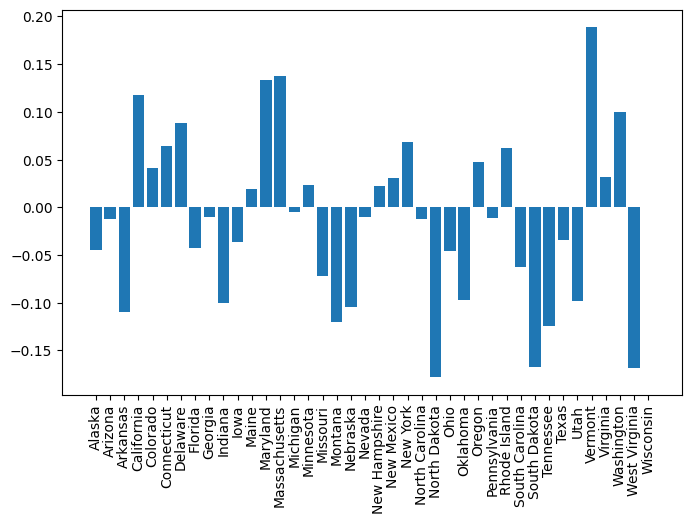

In [54]:
fig,ax = plt.subplots(1,figsize=(8,5))

plt.bar(pred_winner.keys(), np.array(pred_percent_list)-0.5)
plt.xticks(rotation=90)

plt.show()

In [55]:
pred_winner

{'Alaska': 'R',
 'Arizona': 'R',
 'Arkansas': 'R',
 'California': 'D',
 'Colorado': 'D',
 'Connecticut': 'D',
 'Delaware': 'D',
 'Florida': 'R',
 'Georgia': 'R',
 'Indiana': 'R',
 'Iowa': 'R',
 'Maine': 'D',
 'Maryland': 'D',
 'Massachusetts': 'D',
 'Michigan': 'R',
 'Minnesota': 'D',
 'Missouri': 'R',
 'Montana': 'R',
 'Nebraska': 'R',
 'Nevada': 'R',
 'New Hampshire': 'D',
 'New Mexico': 'D',
 'New York': 'D',
 'North Carolina': 'R',
 'North Dakota': 'R',
 'Ohio': 'R',
 'Oklahoma': 'R',
 'Oregon': 'D',
 'Pennsylvania': 'R',
 'Rhode Island': 'D',
 'South Carolina': 'R',
 'South Dakota': 'R',
 'Tennessee': 'R',
 'Texas': 'R',
 'Utah': 'R',
 'Vermont': 'D',
 'Virginia': 'D',
 'Washington': 'D',
 'West Virginia': 'R',
 'Wisconsin': 'D'}

In [56]:
pred_winner_polls

{'Alaska': 'R',
 'Arizona': 'R',
 'Arkansas': 'R',
 'California': 'D',
 'Colorado': 'D',
 'Connecticut': 'D',
 'Delaware': 'D',
 'Florida': 'R',
 'Georgia': 'R',
 'Indiana': 'R',
 'Iowa': 'R',
 'Maine': 'D',
 'Maryland': 'D',
 'Massachusetts': 'D',
 'Michigan': 'D',
 'Minnesota': 'D',
 'Missouri': 'R',
 'Montana': 'R',
 'Nebraska': 'R',
 'Nevada': 'R',
 'New Hampshire': 'D',
 'New Mexico': 'D',
 'New York': 'D',
 'North Carolina': 'R',
 'North Dakota': 'R',
 'Ohio': 'R',
 'Oklahoma': 'R',
 'Oregon': 'D',
 'Pennsylvania': 'R',
 'Rhode Island': 'D',
 'South Carolina': 'R',
 'South Dakota': 'R',
 'Tennessee': 'R',
 'Texas': 'R',
 'Utah': 'R',
 'Vermont': 'D',
 'Virginia': 'D',
 'Washington': 'D',
 'West Virginia': 'R',
 'Wisconsin': 'D'}

In [57]:
poll_na

,Region,2party_dem_2020,3rd_party,2020_2024shift,2_party_dem_polls,national
0,Alabama,0.371,0.011,-0.043,NaN,0.479
8,District of Columbia,0.945,0.006,-0.043,NaN,0.479
11,Hawaii,0.650,0.010,-0.043,NaN,0.479
12,Idaho,0.341,0.019,-0.043,NaN,0.479
13,Illinois,0.587,0.011,-0.043,NaN,0.479
16,Kansas,0.425,0.022,-0.043,NaN,0.479
17,Kentucky,0.368,0.012,-0.043,NaN,0.479
18,Louisiana,0.405,0.010,-0.043,NaN,0.479
20,Maine Dist. 1,0.619,0.017,-0.043,NaN,0.479
21,Maine Dist. 2,0.462,0.018,-0.043,NaN,0.479


In [58]:
for i in range(len(poll_na)):

  pred_percent[poll_na.iloc[i,0]] = poll_na.iloc[i,1] +  poll_na.iloc[i,3]

  if poll_na.iloc[i,1] +  poll_na.iloc[i,3] < 0.5:
    pred_winner[poll_na.iloc[i,0]] = "R"
  else:
    pred_winner[poll_na.iloc[i,0]] = "D"

In [62]:
D = 0
R = 0
for region in pred_winner:
  if pred_winner[region] == "D":
    D += electoral_college_2024.loc[electoral_college_2024['Region'] == region, 'Votes'].values[0]
  else:
    R += electoral_college_2024.loc[electoral_college_2024['Region'] == region, 'Votes'].values[0]

In [63]:
D

236

In [64]:
R

302

In [65]:
pred_percent

{'Alaska': 0.45485193,
 'Arizona': 0.48741376,
 'Arkansas': 0.39000183,
 'California': 0.6174824,
 'Colorado': 0.5409693,
 'Connecticut': 0.5646507,
 'Delaware': 0.5884326,
 'Florida': 0.45688844,
 'Georgia': 0.48970407,
 'Indiana': 0.39933372,
 'Iowa': 0.4634772,
 'Maine': 0.51962537,
 'Maryland': 0.6333024,
 'Massachusetts': 0.6378076,
 'Michigan': 0.4953516,
 'Minnesota': 0.523346,
 'Missouri': 0.4278792,
 'Montana': 0.37970406,
 'Nebraska': 0.39497387,
 'Nevada': 0.4897452,
 'New Hampshire': 0.5218429,
 'New Mexico': 0.53045076,
 'New York': 0.5679735,
 'North Carolina': 0.4871934,
 'North Dakota': 0.32205355,
 'Ohio': 0.45366597,
 'Oklahoma': 0.40298444,
 'Oregon': 0.54700106,
 'Pennsylvania': 0.48900998,
 'Rhode Island': 0.5622262,
 'South Carolina': 0.4368556,
 'South Dakota': 0.33239377,
 'Tennessee': 0.37552518,
 'Texas': 0.4652536,
 'Utah': 0.40186256,
 'Vermont': 0.6888763,
 'Virginia': 0.5317494,
 'Washington': 0.5997527,
 'West Virginia': 0.3315208,
 'Wisconsin': 0.500119,

In [87]:
df = pd.read_csv(os.path.join(folder_path, "StatewideAggregatePolling2024.csv"))

republican_results = []

for key in pred_percent.keys():
  republican_results.append({"Region":key, "Trump Vote Share":((1-pred_percent[key])/(1 + df.loc[df['Region'] == key, '3rd_party'].sum()))})

republican_results_pd = pd.DataFrame(republican_results).sort_values(by="Region")

republican_results_pd.to_csv('/content/drive/MyDrive/ElectionForecast/PresidentialElections/republican_results.csv', index=False)


In [85]:
republican_results_pd

,Region,Trump Vote Share
40,Alabama,0.664688
0,Alaska,0.531852
1,Arizona,0.505011
2,Arkansas,0.603361
3,California,0.378356
4,Colorado,0.451802
5,Connecticut,0.430613
6,Delaware,0.407492
41,District of Columbia,0.097416
7,Florida,0.539872
